# Convolutional Neural Network

### Importing the libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [15]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [16]:
training_images = np.expand_dims(training_images, axis=-1) / 255.0


### Preprocessing the Test set

In [17]:
test_images = np.expand_dims(test_images, axis=-1) / 255.0


## Part 2 - Building the CNN

### Initialising the CNN

In [18]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [19]:
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 1]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))


### Step 2 - Pooling

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [22]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [24]:
# cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))


## Part 3 - Training the CNN

### Compiling the CNN

In [25]:
# cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set

In [26]:
# cnn.fit(x=training_set, y=training_labels, validation_data=(test_set, test_labels), epochs=25)
cnn.fit(x=training_images, y=training_labels, validation_data=(test_images, test_labels), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9003 - loss: 0.3270 - val_accuracy: 0.9833 - val_loss: 0.0478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9847 - loss: 0.0475 - val_accuracy: 0.9885 - val_loss: 0.0361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9864 - val_loss: 0.0464
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9898 - val_loss: 0.0311
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9912 - val_loss: 0.0270
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9874 - val_loss: 0.0446
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9966 - loss: 0.0106 - val_accuracy: 0.9916 - val_loss: 0.0295
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9973 -

## Part 4 - Making a single prediction

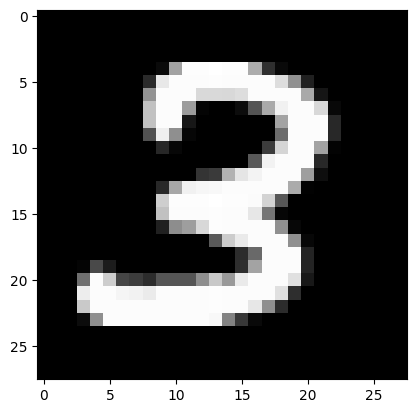

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted digit: 3


In [28]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = cnn.predict(test_image)
# training_set.class_indices
# if result[0][0] == 1:
#   prediction = 'dog'
# else:
#   prediction = 'cat'

import numpy as np
import matplotlib.pyplot as plt

# Select a random test image from MNIST
index = np.random.randint(0, len(test_images))
test_image = test_images[index]  # Shape: (28,28,1)

# Display the test image
plt.imshow(test_image.squeeze(), cmap="gray")
plt.show()

# Expand dimensions to match the model input (batch size = 1)
test_image = np.expand_dims(test_image, axis=0)  # Shape: (1, 28, 28, 1)

# Predict the digit
result = cnn.predict(test_image)
predicted_label = np.argmax(result)

print(f"Predicted digit: {predicted_label}")
